# Scrap / Scratch Notebook for Nick
----

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
# %matplotlib inline
from detect_peaks import detect_peaks

In [2]:
#test data
psd_file = 'test_data/test_data_AFM_psd.csv'
psd = pd.read_csv(psd_file, sep=',')

# psd.rename(columns = {'Test_Data-1':'psd'}, inplace = True)
psd.head()

,Hz,Test_Data-1,Test_Data-2,Test_Data-3
0,0.033333,1.542829e-20,1.542829e-20,1.542829e-20
1,0.066667,1.615678e-20,1.615678e-20,1.615678e-20
2,0.100000,2.142272e-20,2.142272e-20,2.142272e-20
3,0.133333,1.793353e-20,1.793353e-20,1.793353e-20
4,0.166667,3.301479e-20,3.301479e-20,3.301479e-20


In [77]:
# test can we iterate over a df columns except for first (Hz)

# Setup zeros df of same size
psd_no_hz = psd.iloc[:, range(1, len(psd.columns))]
zeros_df = pd.DataFrame(np.zeros_like(psd_no_hz),
                       index=psd_no_hz.index, columns=psd_no_hz.columns)

psd_no_hz = ""

# function params to be
space = 10 
thresh_sd = 3 

for i in range(1, len(psd.columns)):
    y = psd.iloc[:, i]
    thresh = np.mean(y) + thresh_sd*np.std(y)
    ind = detect_peaks(x, mph=thresh, mpd=space)
    # we need to set up a zeroes or nan df, then fill with ind
    # then rm any rows that are all zero or nan
    zeros_df.iloc[ind, i-1] = psd.iloc[ind, i]
    
# make some bullshit to test
zeros_df.iloc[100, 2] = 2e-13
zeros_df.iloc[10000, 0] = 2e-13
zeros_df.iloc[5000, 1] = 2e-13

# zeros_df.plot(y=zeros_df.columns)

# take only rows in which any column contains a non-zero
zeros_df = zeros_df.loc[(zeros_df!=0).any(axis=1)]

# print psd.shape
# print zeros_df.shape

rows = zeros_df.index
hz_peaks = psd.iloc[:,0].loc[rows]

# re integrate hz 
zeros_df.insert(0, 'Hz', hz_peaks)
zeros_df

,Hz,Test_Data-1,Test_Data-2,Test_Data-3
100,3.366667,0.000000e+00,0.000000e+00,2.000000e-13
5000,166.700000,0.000000e+00,2.000000e-13,0.000000e+00
10000,333.366667,2.000000e-13,0.000000e+00,0.000000e+00
13336,444.566667,1.247321e-14,1.247321e-14,1.247321e-14
17500,583.366667,1.345013e-14,1.345013e-14,1.345013e-14
17709,590.333333,3.225882e-13,3.225882e-13,3.225882e-13
17721,590.733333,2.852620e-14,2.852620e-14,2.852620e-14
22090,736.366667,1.345621e-14,1.345621e-14,1.345621e-14


----
# Test Output

### fftz_trap.py

In [ ]:
# psd out
infile = 'test_data/optic_test/optic_test_z_psd.csv'
psd = pd.read_csv(infile, sep=',')
print psd.head()
print psd.shape
print psd

In [3]:
# peaks out
infile = 'test_data/optic_test/optic_test_z_psd_peaks.csv'
peaks = pd.read_csv(infile, sep=',')
print peaks.head()
print peaks.tail()
print peaks.shape

         Hz  Optic_Test-1  Optic_Test-2
0  1.000000  4.140594e-17  4.140594e-17
1  1.733333  2.460699e-17  2.460699e-17
2  2.533333  1.567874e-17  1.567874e-17
3  3.800000  1.039222e-17  1.039222e-17
4  5.000000  8.596849e-18  8.596849e-18
             Hz  Optic_Test-1  Optic_Test-2
77  2054.466667  2.171043e-18  2.171043e-18
78  2055.533333  1.195844e-18  1.195844e-18
79  2089.600000  1.846183e-18  1.846183e-18
80  2091.133333  2.346723e-18  2.346723e-18
81  2092.266667  2.895038e-18  2.895038e-18
(82, 3)


<IPython.core.display.Javascript object>


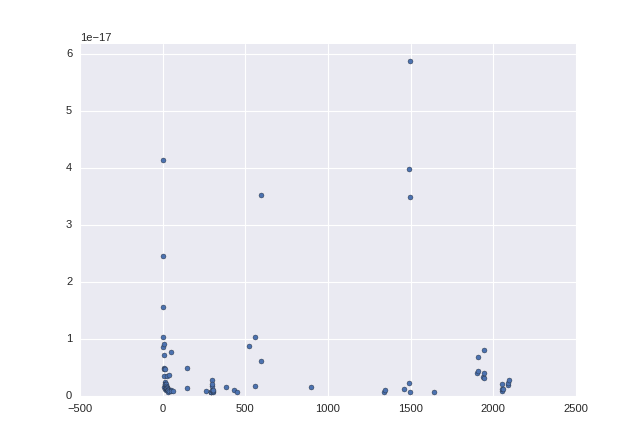

In [12]:
## This is copied basically wholesale
from matplotlib import collections as matcoll

x = peaks.iloc[:,0] 
y = peaks.iloc[:,1]

lines = []
for i in range(len(x)):
    pair=[(x[i],0), (x[i], y[i])]
    lines.append(pair)

fig, ax = plt.subplots()

# linecoll = matcoll.LineCollection(lines)
# ax.add_collection(linecoll)

# plt.xticks(x)
plt.ylim(0, max(y) + 0.05 * max(y))

plt.scatter(x,y)

### fftz_afm.py

In [80]:
infile = 'test_data/test_data_AFM_psd_peaks.csv'
psd = pd.read_csv(infile, sep=',')
print psd.head()
print psd.shape
print psd

           Hz   Test_Data-1   Test_Data-2   Test_Data-3
0  444.566667  1.247321e-14  1.247321e-14  1.247321e-14
1  583.366667  1.345013e-14  1.345013e-14  1.345013e-14
2  590.333333  3.225882e-13  3.225882e-13  3.225882e-13
3  590.733333  2.852620e-14  2.852620e-14  2.852620e-14
4  736.366667  1.345621e-14  1.345621e-14  1.345621e-14
(5, 4)
           Hz   Test_Data-1   Test_Data-2   Test_Data-3
0  444.566667  1.247321e-14  1.247321e-14  1.247321e-14
1  583.366667  1.345013e-14  1.345013e-14  1.345013e-14
2  590.333333  3.225882e-13  3.225882e-13  3.225882e-13
3  590.733333  2.852620e-14  2.852620e-14  2.852620e-14
4  736.366667  1.345621e-14  1.345621e-14  1.345621e-14
